<a href="https://colab.research.google.com/github/Atadewa/Machine-Learning-2025/blob/main/Kuis-1/JS04_SOAL_KUIS1_ML_Aditya_Atadewa_2341720174.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identitas

### Nama: Aditya Atadewa  
### Kelas: TI 3G  
### NIM: 2341720174  
### No. Absen:  01

# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [67]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [68]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [69]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [70]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [71]:
# Data Size
df.shape

(48842, 15)

In [72]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [73]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan



### Jawaban Nomor 1

In [74]:
# Inspeksi Profile Data

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [75]:
print('Pengecekan Dimensi')
df.shape

Pengecekan Dimensi


(48842, 15)

In [76]:
print('Pengecekan Tipe Data')
df.info()

Pengecekan Tipe Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [77]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### Jawaban Nomor 2

In [78]:
print('Pengecekan Jumlah Data yang Hilang untuk Setiap Kolom')
df.isnull().sum()

Pengecekan Jumlah Data yang Hilang untuk Setiap Kolom


,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


**Variabel yang hilang:**  
workclass: 963 data  
occupation: 966 data  
native-country: 274 data

## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [79]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

### Jawaban Nomor 1

Pada ketiga variabel yang memiliki nilai null, yiatu workclass, occupation, native-country datanya bertipe kategorikal, sehingga saya menggunakan metode imputasi: mengisi nilai yang hilang dengan nilai modus.

In [80]:
for col in ['workclass', 'occupation', 'native-country']:
    modus = df[col].mode()[0]
    df[col] = df[col].fillna(modus)


### Jawaban Soal 2

Mengecek apakah masih terdapat data yang hilang

In [81]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


Terlihat bahwa sudah tidak ada data yang hilang pada semua variabel, terutama pada workclass, occupation, native-country

## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [82]:
# Melihat Kolom Kategorikal
variabel_kategorikal = df.select_dtypes(include='object').columns
print("Kolom kategorikal:", variabel_kategorikal)

# Melihat nilai unik per kolom
for col in variabel_kategorikal:
    print(f"\nNilai unik dari Kolom: {col}")
    print(df[col].value_counts())

Kolom kategorikal: Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

Nilai unik dari Kolom: workclass
workclass
Private             34869
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

Nilai unik dari Kolom: education
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

Nilai unik dari Kolom: marital-status
marital-status
Married-civ-spouse       22379
Never-married   

Terlihat bahawa terdapat value yang tidak sesuai, yaitu '?' pada kolom workclass, occupation, dan native-country

In [83]:
# Melakukan penyesuaian untuk value yang tidak sesuai pada kolom workclass, occupation, dan native-country

# Mengganti value '?' menjadi 'Others'
for col in ['workclass', 'occupation', 'native-country']:
    df[col] = df[col].replace('?', 'Others')

# Membersihkan duplikasi income karena kesalahan penulisan
df['income'] = df['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})

In [84]:
# Mengecek ulang
for col in ['workclass','occupation','native-country','income']:
    print(f"\nNilai unik dari Kolom: {col}")
    print(df[col].value_counts())


Nilai unik dari Kolom: workclass
workclass
Private             34869
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Others               1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

Nilai unik dari Kolom: occupation
occupation
Prof-specialty       7138
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Others               1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

Nilai unik dari Kolom: native-country
native-country
United-States                 44106
Mexico                          951
Others                          583
Philippines                     295
Germany                         206


Terlihat bahwa sudah tidak ada data yang tidak sesuai, seperti '?' dan data duplikasi karena kesalahan penulisan.

# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

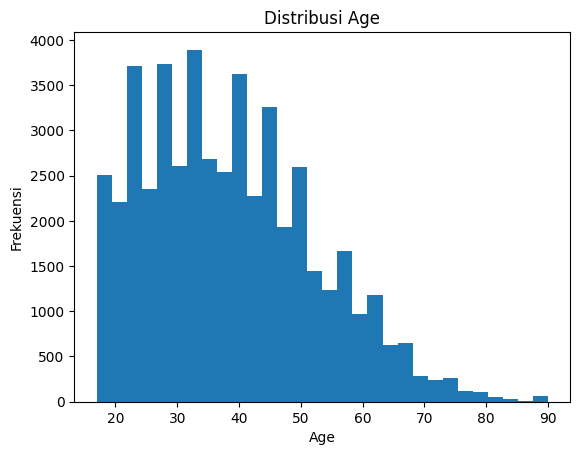

In [85]:
# Jawab 1.1 - Histrogram

for col in ['age']:
    plt.figure()
    plt.hist(df[col], bins=30)
    plt.title(f'Distribusi Age')
    plt.xlabel('Age'); plt.ylabel('Frekuensi')
    plt.show()

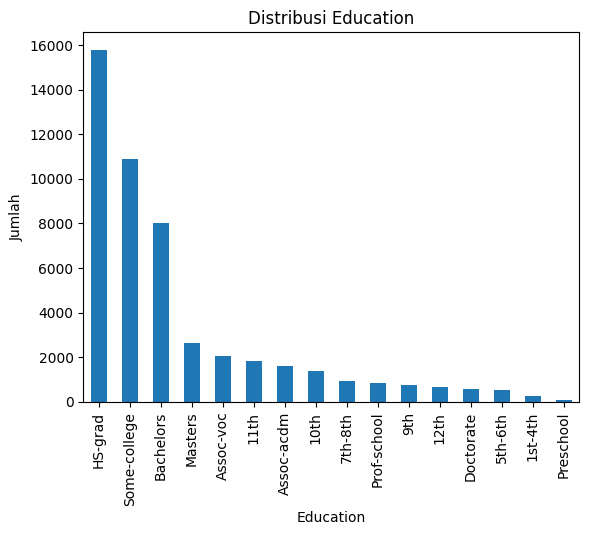

In [86]:
# Jawab 1.2 - Barchart

df['education'].value_counts(dropna=False).plot(kind='bar')
plt.title('Distribusi Education')
plt.xlabel('Education')
plt.ylabel('Jumlah')
plt.show()

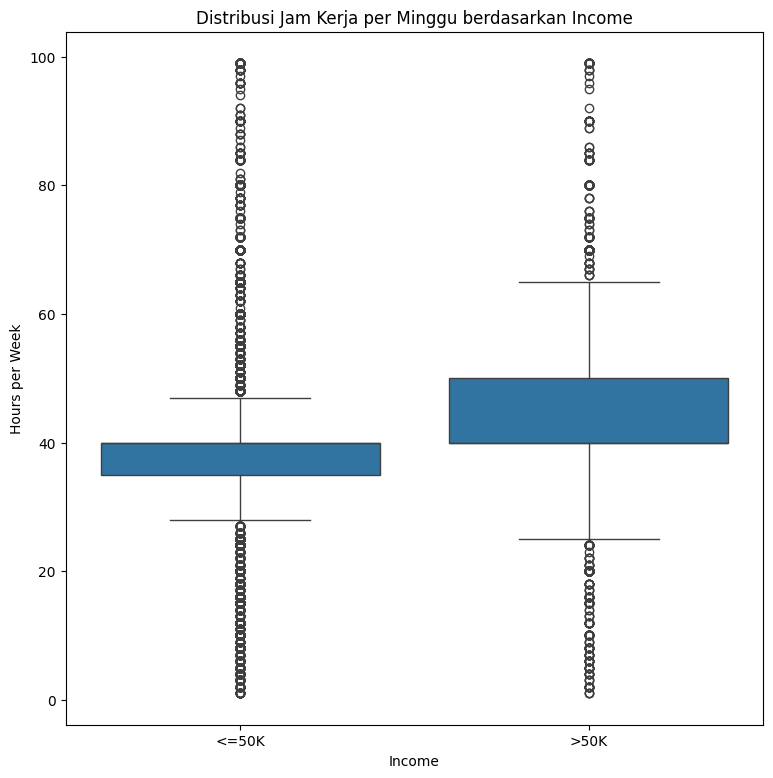

In [87]:
# Jawab 1.3 - Boxplot

plt.figure(figsize=(9,9))
sns.boxplot(data=df, x='income', y='hours-per-week')
plt.title('Distribusi Jam Kerja per Minggu berdasarkan Income')
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.show()



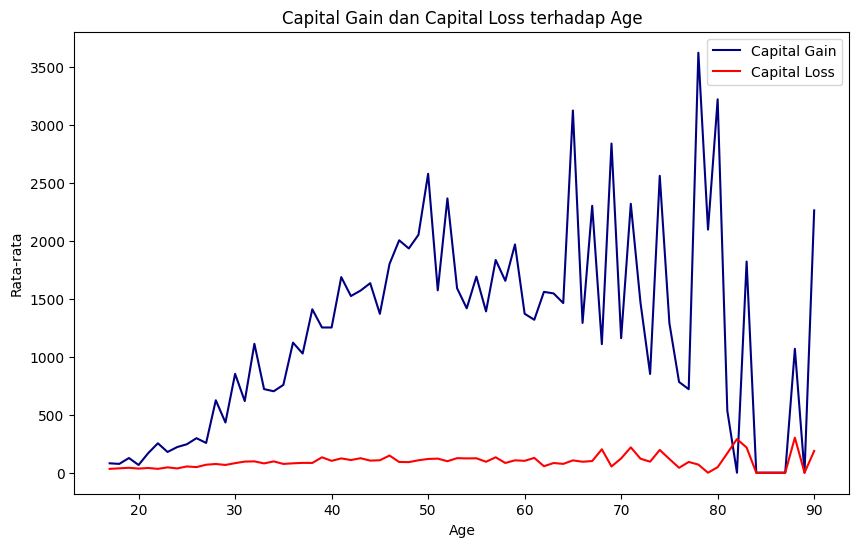

In [88]:
# Jawab 1.4 - Lineplot

age_group = df.groupby('age')[['capital-gain','capital-loss']].mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(age_group['age'], age_group['capital-gain'], label='Capital Gain', color='navy')
plt.plot(age_group['age'], age_group['capital-loss'], label='Capital Loss', color='red')
plt.title('Capital Gain dan Capital Loss terhadap Age')
plt.xlabel('Age')
plt.ylabel('Rata-rata')
plt.legend()
plt.show()

## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [89]:
# Jawab dengan komentar python

# Jawaban Nomor 1 dan 2
'''
1. Distribusi age cenderung miring (skewed), mayoritas responden berada di kelompok usia produktif 20–50 tahun, sedangkan usia tua relatif sedikit
2. Jika terdapat data hilang pada variabel age, strategi yang diterapkan adalah mengisi dengan median karena distribusi usia tidak simetris sempurna dan berpotensi mengandung outlier, sedangkan median lebih tahan terhadap pengaruh nilai ekstrem dibandingkan mean.
'''

'\n1. Distribusi age cenderung miring (skewed), mayoritas responden berada di kelompok usia produktif 20–50 tahun, sedangkan usia tua relatif sedikit\n2. Jika terdapat data hilang pada variabel age, strategi yang diterapkan adalah mengisi dengan median karena distribusi usia tidak simetris sempurna dan berpotensi mengandung outlier, sedangkan median lebih tahan terhadap pengaruh nilai ekstrem dibandingkan mean.\n'

In [90]:
#Jawaban Nomor 3
income_rendah = df[df['income'] == '<=50K']['hours-per-week']
income_tinggi = df[df['income'] == '>50K']['hours-per-week']

Q1_rendah = income_rendah.quantile(0.25)
Q3_rendah = income_rendah.quantile(0.75)
IQR_rendah = Q3_rendah - Q1_rendah
batas_bawah_rendah = Q1_rendah - 1.5 * IQR_rendah
batas_atas_rendah = Q3_rendah + 1.5 * IQR_rendah
outliers_rendah = ((income_rendah < batas_bawah_rendah) | (income_rendah > batas_atas_rendah)).sum()

print("Jumlah outlier <=50K:", outliers_rendah)

Q1_tinggi = income_tinggi.quantile(0.25)
Q3_tinggi = income_tinggi.quantile(0.75)
IQR_tinggi = Q3_tinggi - Q1_tinggi
batas_bawah_tinggi = Q1_tinggi - 1.5 * IQR_tinggi
batas_atas_tinggi = Q3_tinggi + 1.5 * IQR_tinggi
outliers_tinggi = ((income_tinggi < batas_bawah_tinggi) | (income_tinggi > batas_atas_tinggi)).sum()

print("Jumlah outlier >50K:", outliers_tinggi)

'''
3. Terlihat Bahwa:
- Jumlah outlier pada income <=50K sebanyak 11706 outlier
- Jumlah outlier pada income >50K sebanyak 781 outlier

Kategori apa yang paling banyak memiliki outlier adalah income <= 50K
'''

Jumlah outlier <=50K: 11706
Jumlah outlier >50K: 781


'\n3. Terlihat Bahwa:\n- Jumlah outlier pada income <=50K sebanyak 11706 outlier\n- Jumlah outlier pada income >50K sebanyak 781 outlier\n\nKategori apa yang paling banyak memiliki outlier adalah income <= 50K\n'

# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [91]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# Variabel sex diubah menjadi binary (Male = 1, Female = 0)
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

# Variabel income yang merupakan target juga diubah menjadi binary (<=50K = 0, >50K = 1)
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

# Mengecek Hasil
print(df['sex'].value_counts())
print(df['income'].value_counts())

sex
1    32650
0    16192
Name: count, dtype: int64
income
0    37155
1    11687
Name: count, dtype: int64


# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

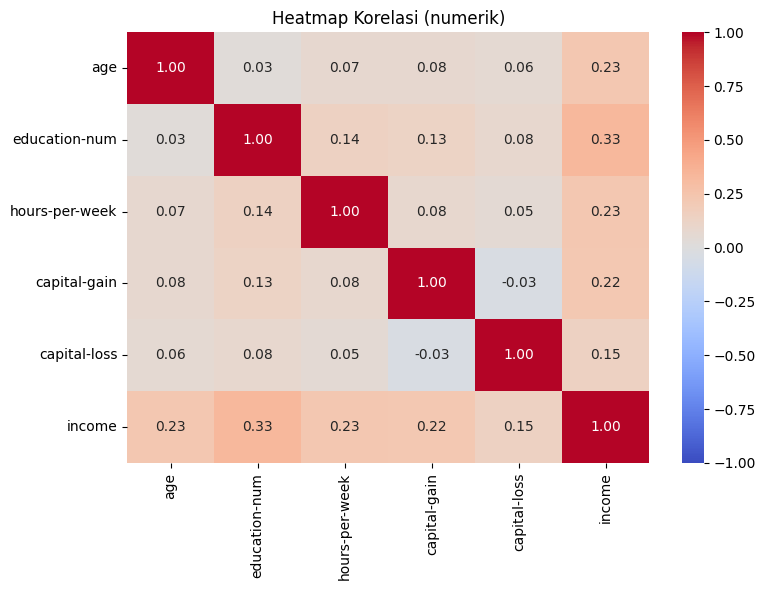

In [92]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

kolom = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']

num_only = df[kolom]
corr = num_only.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, annot=True, fmt=".2f")
plt.title('Heatmap Korelasi (numerik)')
plt.tight_layout()
plt.show()

In [93]:
# Hasil analisis jelaskan pada cell ini

'''
Berdasarkan hasil analisis korelasi, variabel education-num memiliki korelasi paling tinggi dengan income (0.33) dibandingkan variabel lainnya, menunjukkan bahwa semakin tinggi pendidikan, semakin besar peluang pendapatan >50K. Variabel age, hours-per-week, dan capital-gain memiliki korelasi positif sedang terhadap income, sedangkan capital-loss memiliki korelasi positif rendah. Hal ini menunjukkan bahwa tingkat pendidikan merupakan faktor yang paling berpengaruh terhadap pendapatan, sedangkan faktor lain seperti usia, jam kerja, dan capital gain berpengaruh tetapi tidak sebesar pendidikan.
'''

'\nBerdasarkan hasil analisis korelasi, variabel education-num memiliki korelasi paling tinggi dengan income (0.33) dibandingkan variabel lainnya, menunjukkan bahwa semakin tinggi pendidikan, semakin besar peluang pendapatan >50K. Variabel age, hours-per-week, dan capital-gain memiliki korelasi positif sedang terhadap income, sedangkan capital-loss memiliki korelasi positif rendah. Hal ini menunjukkan bahwa tingkat pendidikan merupakan faktor yang paling berpengaruh terhadap pendapatan, sedangkan faktor lain seperti usia, jam kerja, dan capital gain berpengaruh tetapi tidak sebesar pendidikan.\n'

# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [94]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


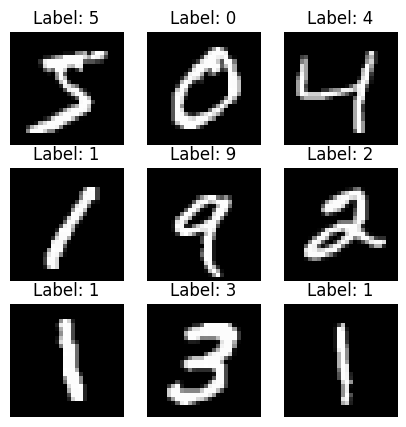

In [95]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

In [ ]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

from skimage.transform import resize

X_test_up = np.zeros((X_test.shape[0], 32, 32))
for i in range(X_test.shape[0]):
    X_test_up[i] = resize(X_test[i], (32, 32), anti_aliasing=True)

print("Shape setelah upsampling:", X_test_up.shape)

print("\nHasil Upsampling ke 32x32")
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test_up[i], cmap='gray')
    plt.title(f"Label: {y_test[i]}")
    plt.axis('off')
plt.show()



## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

Nilai min & max setelah normalisasi: 0.0 0.00392156862745098


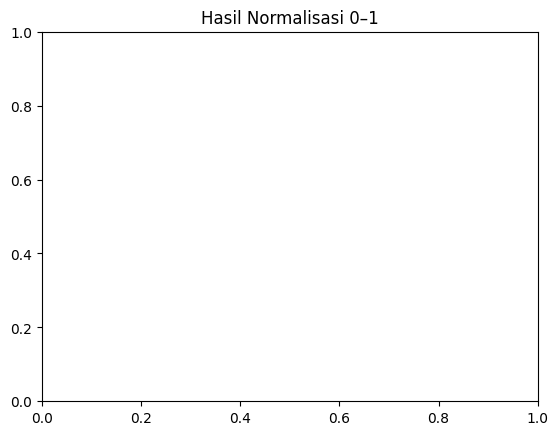

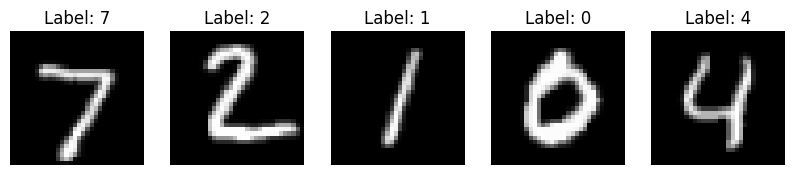

In [64]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

X_test_up_norm = X_test_up / 255.0

print("Nilai min & max setelah normalisasi:",
      X_test_up_norm.min(), X_test_up_norm.max())

# Tampilkan 5 citra hasil normalisasi
plt.title("Hasil Normalisasi 0–1")

plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test_up_norm[i], cmap='gray')
    plt.title(f"Label: {y_test[i]}")
    plt.axis('off')

plt.show()


Nilai min & max setelah normalisasi: 0.0 0.00392156862745098

Hasil Normalisasi 0–1


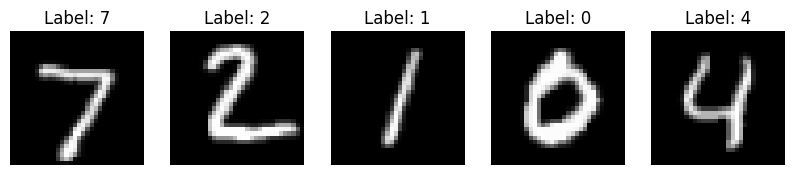

In [65]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

X_test_up_norm = X_test_up / 255.0

print("Nilai min & max setelah normalisasi:",
      X_test_up_norm.min(), X_test_up_norm.max())

print("\nHasil Normalisasi 0–1")

plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test_up_norm[i], cmap='gray')
    plt.title(f"Label: {y_test[i]}")
    plt.axis('off')
plt.show()



## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [66]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

X_test_flat = np.zeros((X_test_up_norm.shape[0], 32*32))
for i in range(X_test_up_norm.shape[0]):
    X_test_flat[i] = X_test_up_norm[i].flatten()

print("Shape setelah flatten:", X_test_flat.shape)
print("Contoh 1 baris pertama:", X_test_flat[0][:10])


Shape setelah flatten: (10000, 1024)
Contoh 1 baris pertama: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
